# **Trabalhando com Planilhas do Excel**

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
#leitura de arquivos
df1 = pd.read_excel('/content/Aracaju.xlsx')
df2 = pd.read_excel('/content/Fortaleza.xlsx')
df3 = pd.read_excel('/content/Natal.xlsx')
df4 = pd.read_excel('/content/Recife.xlsx')
df5 = pd.read_excel('/content/Salvador.xlsx')

In [ ]:
#Juntando todos os arquivos
df = pd.concat([df1,df2,df3,df4,df5])

In [ ]:
#Amostras
df.sample(5)

,Cidade,Data,Vendas,LojaID,Qtde
101,Recife,2019-01-01,172.55,983,7
235,Salvador,2019-01-03,41.84,1034,1
138,Natal,2019-01-02,212.03,1037,3
129,Fortaleza,2019-03-02,35.34,982,7
65,Salvador,2019-01-01,3.39,1034,2


In [ ]:
#Alterando tipo de dado da coluna
df['LojaID'] = df['LojaID'].astype('object')
df.dtypes

Cidade            object
Data      datetime64[ns]
Vendas           float64
LojaID            object
Qtde               int64
dtype: object

In [ ]:
#Consultando linhas com valores faltantes
df.isnull().sum()

Cidade    0
Data      0
Vendas    0
LojaID    0
Qtde      0
dtype: int64

In [ ]:
#Substituindo os valores nulos pela média
df['Vendas'].fillna(df['Vendas'].mean(), inplace=True)

In [ ]:
#Substituindo os valores nulos por zero
df['Vendas'].fillna(0, inplace=True)

In [ ]:
#Apagando as linhas com valor nulo
df.dropna(inplace=True)

In [ ]:
#Apagando as linhas com valores nulos com base em uma coluna
df.dropna(subset=['Vendas'], inplace=True)

In [ ]:
#Removendo linhas que estejam com valores faltantes em todas as colunas
df.dropna(how='all', inplace=True)

# Criando novas colunas

In [ ]:
#Criando a coluna de receita
df['Receita'] = df['Vendas'].mul(df['Qtde'])

In [ ]:
df.head()

,Cidade,Data,Vendas,LojaID,Qtde,Receita
0,Aracaju,2018-01-01,142.00,1520,1,142.00
1,Aracaju,2018-01-01,14.21,1522,6,85.26
2,Aracaju,2018-01-01,71.55,1520,1,71.55
3,Aracaju,2018-01-01,3.01,1521,7,21.07
4,Aracaju,2018-01-01,24.51,1522,8,196.08


In [ ]:
#Receita por Venda e msm coisa que a qtd
df['Receita/Venda'] = df['Receita'] / df['Vendas']

In [ ]:
df.head()

,Cidade,Data,Vendas,LojaID,Qtde,Receita,Receita/Venda
0,Aracaju,2018-01-01,142.00,1520,1,142.00,1.0
1,Aracaju,2018-01-01,14.21,1522,6,85.26,6.0
2,Aracaju,2018-01-01,71.55,1520,1,71.55,1.0
3,Aracaju,2018-01-01,3.01,1521,7,21.07,7.0
4,Aracaju,2018-01-01,24.51,1522,8,196.08,8.0


In [ ]:
#Retornando a maior receita
df['Receita'].max()

3544.0

In [ ]:
#Retornando a menor receita
df['Receita'].min()

3.34

In [ ]:
#Retorna os tops maiores 
df.nlargest(5, 'Receita') 

,Cidade,Data,Vendas,LojaID,Qtde,Receita,Receita/Venda
7,Natal,2019-03-18,886.0,853,4,3544.0,4.0
51,Natal,2018-01-21,859.0,852,4,3436.0,4.0
55,Natal,2019-01-08,859.0,854,4,3436.0,4.0
30,Natal,2018-10-02,856.0,853,4,3424.0,4.0
41,Natal,2018-05-20,835.0,852,4,3340.0,4.0


In [ ]:
#Retorna os tops menores 
df.nsmallest(5, 'Receita') 

,Cidade,Data,Vendas,LojaID,Qtde,Receita,Receita/Venda
118,Aracaju,2018-01-01,3.34,1522,1,3.34,1.0
65,Recife,2019-01-01,4.01,981,1,4.01,1.0
92,Natal,2019-01-02,4.57,1035,1,4.57,1.0
92,Salvador,2019-01-01,4.57,1035,1,4.57,1.0
95,Natal,2019-01-02,5.13,1035,1,5.13,1.0


In [ ]:
#Agrupamento por cidade
df.groupby('Cidade')['Receita'].sum()

Cidade
Aracaju       48748.25
Fortaleza     37913.97
Natal        167227.52
Recife        51936.51
Salvador      40596.73
Name: Receita, dtype: float64

In [ ]:
#Agrupamento por cidade e ordenado
df.sort_values('Receita', ascending=False).head(10)

,Cidade,Data,Vendas,LojaID,Qtde,Receita,Receita/Venda
7,Natal,2019-03-18,886.0,853,4,3544.0,4.0
55,Natal,2019-01-08,859.0,854,4,3436.0,4.0
51,Natal,2018-01-21,859.0,852,4,3436.0,4.0
30,Natal,2018-10-02,856.0,853,4,3424.0,4.0
41,Natal,2018-05-20,835.0,852,4,3340.0,4.0
38,Natal,2018-02-25,828.0,852,4,3312.0,4.0
10,Natal,2018-10-27,828.0,852,4,3312.0,4.0
69,Natal,2019-03-24,817.0,852,4,3268.0,4.0
62,Natal,2018-02-10,793.0,854,4,3172.0,4.0
52,Natal,2018-04-27,778.0,854,4,3112.0,4.0


In [ ]:
#Agrupamento por cidade ordenado em ordem crescente
df.groupby('Cidade')['Receita'].sum().sort_values()

Cidade
Fortaleza     37913.97
Salvador      40596.73
Aracaju       48748.25
Recife        51936.51
Natal        167227.52
Name: Receita, dtype: float64

# Trabalhando com Datas

In [ ]:
#Alterando a coluna data em tipo inteiro
df['Data'] = df['Data'].astype('int64')
#df.dtypes


In [ ]:
#Transformando a coluna Data em data
df['Data'] = pd.to_datetime(df['Data'])
df.dtypes

Cidade                   object
Data             datetime64[ns]
Vendas                  float64
LojaID                   object
Qtde                      int64
Receita                 float64
Receita/Venda           float64
dtype: object

In [ ]:
#Agrupamento p/ ano
df.groupby(df['Data'].dt.year)['Receita'].sum()

Data
2018    118176.53
2019    228246.45
Name: Receita, dtype: float64

In [ ]:
#Criando uma nova coluna com o ano
df['Ano_venda'] = df['Data'].dt.year
df.head()

,Cidade,Data,Vendas,LojaID,Qtde,Receita,Receita/Venda,Ano_venda
0,Aracaju,2018-01-01,142.00,1520,1,142.00,1.0,2018
1,Aracaju,2018-01-01,14.21,1522,6,85.26,6.0,2018
2,Aracaju,2018-01-01,71.55,1520,1,71.55,1.0,2018
3,Aracaju,2018-01-01,3.01,1521,7,21.07,7.0,2018
4,Aracaju,2018-01-01,24.51,1522,8,196.08,8.0,2018


In [ ]:
df.sample(5)

,Cidade,Data,Vendas,LojaID,Qtde,Receita,Receita/Venda,Ano_venda
2,Fortaleza,2019-02-10,35.33,1004,3,105.99,3.0,2019
121,Recife,2019-03-02,41.55,981,3,124.65,3.0,2019
239,Natal,2019-01-03,161.41,1037,3,484.23,3.0,2019
9,Fortaleza,2019-01-01,11.17,1002,6,67.02,6.0,2019
19,Fortaleza,2019-01-01,18.86,1002,3,56.58,3.0,2019


In [ ]:
#Extraindo o mês e o dia
df['mes_venda'], df['dia_venda'] = df['Data'].dt.month, df['Data'].dt.day

In [ ]:
df.sample(5)

,Cidade,Data,Vendas,LojaID,Qtde,Receita,Receita/Venda,Ano_venda,mes_venda,dia_venda
82,Salvador,2019-01-01,207.88,1035,1,207.88,1.0,2019,1,1
205,Natal,2019-01-02,196.09,1037,1,196.09,1.0,2019,1,2
52,Natal,2018-04-27,778.00,854,4,3112.00,4.0,2018,4,27
13,Natal,2018-09-12,458.00,852,4,1832.00,4.0,2018,9,12
163,Salvador,2019-01-02,17.66,1036,3,52.98,3.0,2019,1,2


In [ ]:
#Retornando a data mais antiga
df['Data'].min()

Timestamp('2018-01-01 00:00:00')

In [ ]:
#Criando a colua de trimestre
df['trimestre_vendas'] = df['Data'].dt.quarter
df.sample(5)

,Cidade,Data,Vendas,LojaID,Qtde,Receita,Receita/Venda,Ano_venda,mes_venda,dia_venda,semestre_vendas,diferenca_dias,trimestre_vendas
227,Natal,2019-01-02,14.70,1035,1,14.70,1.0,2019,1,2,1,366 days,1
63,Fortaleza,2019-01-01,118.17,1004,1,118.17,1.0,2019,1,1,1,365 days,1
38,Natal,2018-02-25,828.00,852,4,3312.00,4.0,2018,2,25,1,55 days,1
121,Fortaleza,2019-03-02,41.55,981,3,124.65,3.0,2019,3,2,1,425 days,1
17,Natal,2018-02-18,276.00,854,3,828.00,3.0,2018,2,18,1,48 days,1


In [ ]:
#Calculando a diferença entre os dias
df['diferenca_dias'] = df['Data'] - df['Data'].min()
df.sample(5)

,Cidade,Data,Vendas,LojaID,Qtde,Receita,Receita/Venda,Ano_venda,mes_venda,dia_venda,semestre_vendas,diferenca_dias,trimestre_vendas
26,Recife,2019-01-01,126.05,980,1,126.05,1.0,2019,1,1,1,365 days,1
11,Fortaleza,2019-01-01,42.19,1003,3,126.57,3.0,2019,1,1,1,365 days,1
163,Natal,2019-01-02,17.66,1036,3,52.98,3.0,2019,1,2,1,366 days,1
128,Natal,2019-01-02,36.84,1034,1,36.84,1.0,2019,1,2,1,366 days,1
109,Natal,2019-01-02,124.37,1035,1,124.37,1.0,2019,1,2,1,366 days,1


In [ ]:
#filtrando as vendas do mês de março
vendas_marco_19 = df.loc[(df['Data'].dt.year == 2019) & (df['Data'].dt.month == 3)]

In [ ]:
vendas_marco_19

,Cidade,Data,Vendas,LojaID,Qtde,Receita,Receita/Venda,Ano_venda,mes_venda,dia_venda,semestre_vendas,diferenca_dias,trimestre_vendas
108,Fortaleza,2019-03-02,152.89,981,4,611.56,4.0,2019,3,2,1,425 days,1
109,Fortaleza,2019-03-02,18.90,982,6,113.40,6.0,2019,3,2,1,425 days,1
110,Fortaleza,2019-03-02,51.98,983,6,311.88,6.0,2019,3,2,1,425 days,1
111,Fortaleza,2019-03-02,8.00,981,3,24.00,3.0,2019,3,2,1,425 days,1
112,Fortaleza,2019-03-02,133.59,982,1,133.59,1.0,2019,3,2,1,425 days,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
137,Salvador,2019-03-02,51.66,1036,3,154.98,3.0,2019,3,2,1,425 days,1
138,Salvador,2019-03-02,212.03,1037,3,636.09,3.0,2019,3,2,1,425 days,1
139,Salvador,2019-03-02,169.01,1036,1,169.01,1.0,2019,3,2,1,425 days,1
140,Salvador,2019-03-02,20.79,1036,2,41.58,2.0,2019,3,2,1,425 days,1


# Visualização de dados

In [ ]:
df['LojaID'].value_counts(ascending=False)

1036    117
1035    112
1037    101
1034     67
983      65
982      44
1522     41
1520     39
980      36
981      31
1002     30
1005     30
852      29
1523     29
1004     28
854      28
853      26
1521     21
1003     20
Name: LojaID, dtype: int64

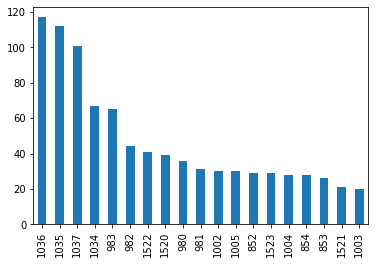

In [ ]:
#Gráfico de barras Vertical
df['LojaID'].value_counts(ascending=False).plot.bar()

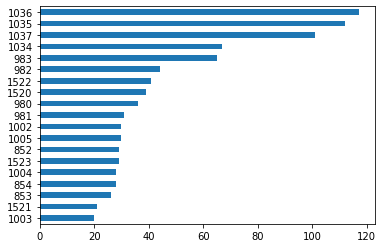

In [ ]:
#Gráfico de barras Horizontal
df['LojaID'].value_counts(ascending=True).plot.barh();

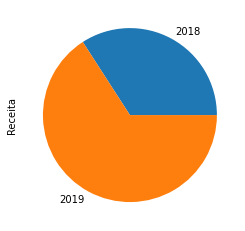

In [ ]:
#Gráfico de pizza(setores)
df.groupby(df['Data'].dt.year)['Receita'].sum().plot.pie()

In [ ]:
#Total vendas por cidade
df['Cidade'].value_counts()

Salvador     240
Natal        240
Fortaleza    142
Recife       142
Aracaju      130
Name: Cidade, dtype: int64

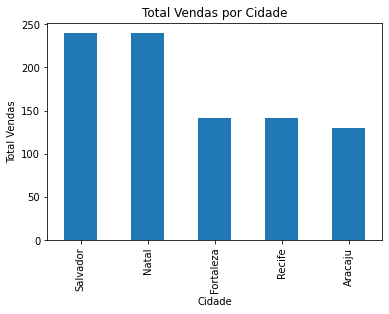

In [ ]:
#Adicionando um título e alterando o nome dos eixos
#A biblioteca necessária foi importada no começo do código 
df['Cidade'].value_counts().plot.bar(title="Total Vendas por Cidade")
plt.xlabel('Cidade')
plt.ylabel('Total Vendas');

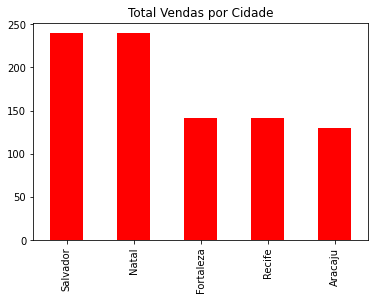

In [ ]:
#Alterando Cor
df['Cidade'].value_counts().plot.bar(title="Total Vendas por Cidade", color='red')

In [ ]:
#Alterando o estilo
plt.style.use('ggplot')

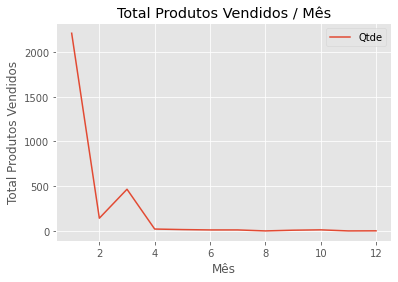

In [ ]:
df.groupby(df['mes_venda'])['Qtde'].sum().plot(title="Total Produtos Vendidos / Mês")
plt.xlabel('Mês')
plt.ylabel('Total Produtos Vendidos');
plt.legend();

In [ ]:
#Selecionando apenas as vendas de 2019
df_2019 = df[df['Ano_venda'] == 2019]
df_2019.groupby(df_2019['mes_venda'])['Qtde'].sum()

mes_venda
1    1541
2     128
3     460
4      12
Name: Qtde, dtype: int64

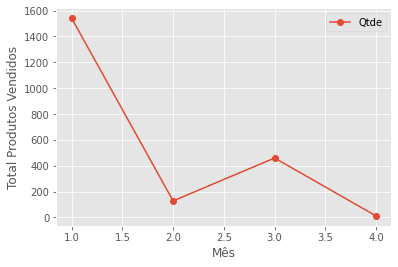

In [ ]:
#Total produtos vendidos por mês
df_2019.groupby(df_2019['mes_venda'])['Qtde'].sum().plot(marker = 'o')
plt.xlabel('Mês')
plt.ylabel('Total Produtos Vendidos')
plt.legend();

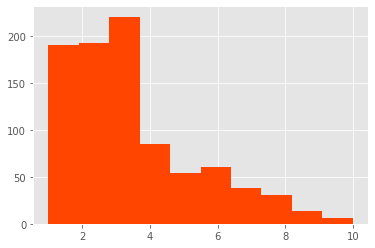

In [ ]:
#Gráfico de Histograma
plt.hist(df['Qtde'], color='orangered');

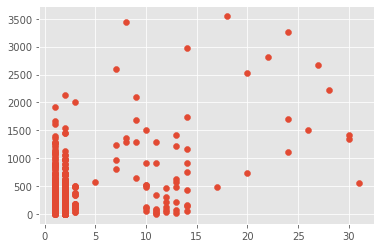

In [ ]:
#Gráfico de Dispersão
plt.scatter(x=df_2019['dia_venda'], y=df_2019['Receita']);

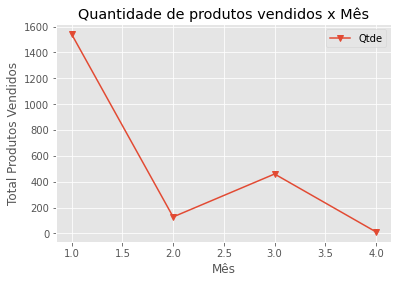

In [ ]:
#Salvando as png
df_2019.groupby(df_2019['mes_venda'])['Qtde'].sum().plot(marker='v')
plt.title('Quantidade de produtos vendidos x Mês')
plt.xlabel('Mês')
plt.ylabel('Total Produtos Vendidos')
plt.legend();
plt.savefig('grafico QTDE x Mes.png')